Original RGB Pixel: [255 128  64]
Normalized RGB Pixel: [1.         0.50196078 0.25098039]
Converted CMY Pixel: [0.         0.49803922 0.74901961]
Reconstructed RGB Pixel: [255 128  64]


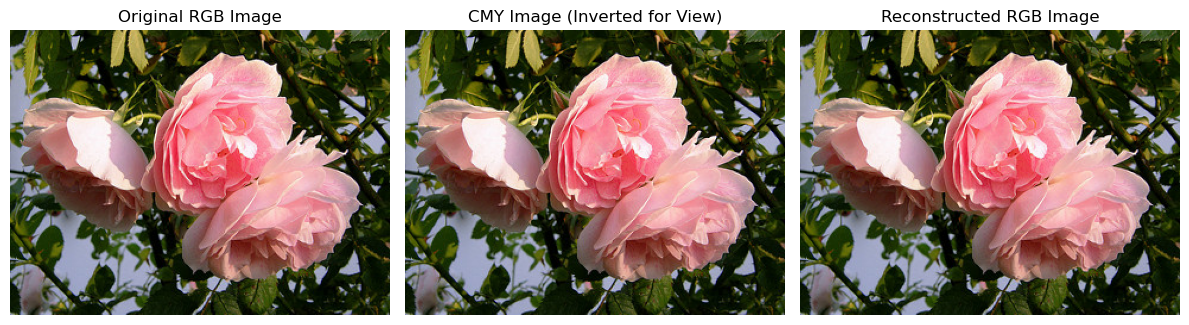

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the RGB to CMY conversion function
def rgb_to_cmy(image):
    """
    Converts an RGB image to CMY color space by performing:
    CMY = 1 - RGB (normalized)
    """
    normalized_rgb = image / 255.0  # Normalize RGB values to the range [0, 1]
    cmy_image = 1 - normalized_rgb  # Apply the formula CMY = 1 - RGB
    return cmy_image

# Define the CMY to RGB conversion function
def cmy_to_rgb(cmy_image):
    """
    Converts a CMY image back to RGB by performing:
    RGB = 1 - CMY (scaled back to 255)
    """
    rgb_image = 1 - cmy_image  # Apply the formula RGB = 1 - CMY
    return (rgb_image * 255).astype(np.uint8)  # Scale back to range [0, 255]

# Load the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
rgb_image = cv2.imread(image_path)  # Load the image in BGR format
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Step-by-step explanation for a sample pixel
sample_pixel = np.array([255, 128, 64])  # Example RGB pixel (in range [0, 255])
print(f"Original RGB Pixel: {sample_pixel}")

# Normalize RGB pixel to [0, 1]
normalized_pixel = sample_pixel / 255.0
print(f"Normalized RGB Pixel: {normalized_pixel}")

# Convert to CMY
cmy_pixel = 1 - normalized_pixel
print(f"Converted CMY Pixel: {cmy_pixel}")

# Convert back to RGB
reconstructed_pixel = 1 - cmy_pixel
reconstructed_pixel_scaled = (reconstructed_pixel * 255).astype(np.uint8)
print(f"Reconstructed RGB Pixel: {reconstructed_pixel_scaled}")

# Convert the entire image
cmy_image = rgb_to_cmy(rgb_image)  # RGB to CMY conversion for the whole image
reconstructed_rgb = cmy_to_rgb(cmy_image)  # CMY to RGB conversion for the whole image

# Display images using Matplotlib
plt.figure(figsize=(12, 8))

# Original RGB Image
plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.title("Original RGB Image")
plt.axis("off")

# CMY Image
plt.subplot(1, 3, 2)
plt.imshow(1 - cmy_image)  # Invert CMY for visualization
plt.title("CMY Image (Inverted for View)")
plt.axis("off")

# Reconstructed RGB Image
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_rgb)
plt.title("Reconstructed RGB Image")
plt.axis("off")

plt.tight_layout()
plt.show()
